In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")



In [ ]:
dfs = dict()
dfs["campaign_desc"] = pd.read_csv("campaign_desc.csv")
dfs["campaign_desc"].head()


,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [ ]:
campaign_desc=dfs["campaign_desc"]
campaign_desc = campaign_desc[campaign_desc['START_DAY']<615]

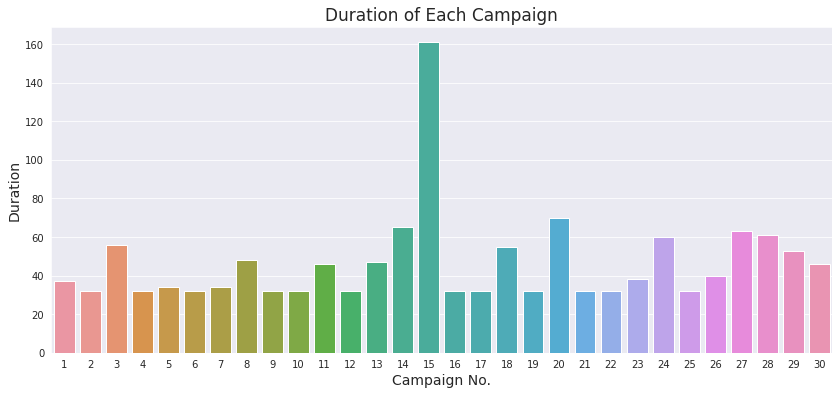

In [ ]:
dfs["campaign_desc"]["DUR"] = dfs["campaign_desc"].END_DAY-dfs["campaign_desc"].START_DAY
fig = plt.figure(figsize=(14,6))
sns.barplot(x="CAMPAIGN",y="DUR",data=dfs["campaign_desc"],orient="v",
            order=dfs["campaign_desc"].sort_values(by="CAMPAIGN").CAMPAIGN.values)
plt.title('Duration of Each Campaign', fontsize=17)
plt.xlabel('Campaign No.', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.show()

In [ ]:

dfs["campaign_table"] = pd.read_csv("campaign_table.csv")
dfs["campaign_table"].head()




,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [ ]:
campaign_table=dfs["campaign_table"]

In [ ]:
total_households = 2500
len(dfs["campaign_table"].household_key.unique())

1584

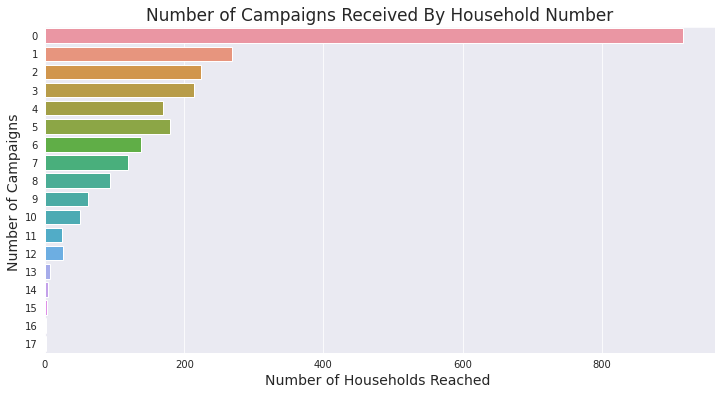

In [ ]:
no_of_received_campaigns_per_house = dfs["campaign_table"].household_key.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_households-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns))
                                        ,columns=["Number of Campaigns Received",
                                                  "Number of Households Reached To"]).sort_values(
                                                                                            by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])
plt.title('Number of Campaigns Received By Household Number', fontsize=17)
plt.xlabel('Number of Households Reached ', fontsize=14)
plt.ylabel('Number of Campaigns ', fontsize=14)
plt.show()

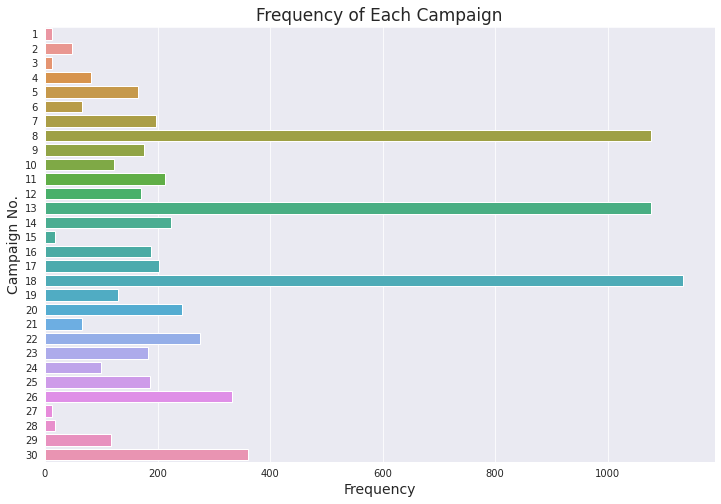

In [ ]:
freq_campaigns = pd.DataFrame(list(zip(dfs["campaign_table"].CAMPAIGN.value_counts().index, 
                                       dfs["campaign_table"].CAMPAIGN.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(12,8))
sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h")
plt.title('Frequency of Each Campaign', fontsize=17)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

In [ ]:
dfs["coupon"] = pd.read_csv("coupon.csv")
dfs["coupon"].head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [ ]:
dfs["coupon_redempt"] = pd.read_csv("coupon_redempt.csv")
dfs["coupon_redempt"].head()

coupon_redempt=dfs["coupon_redempt"]

In [ ]:


len(dfs["coupon_redempt"].household_key.unique())



434

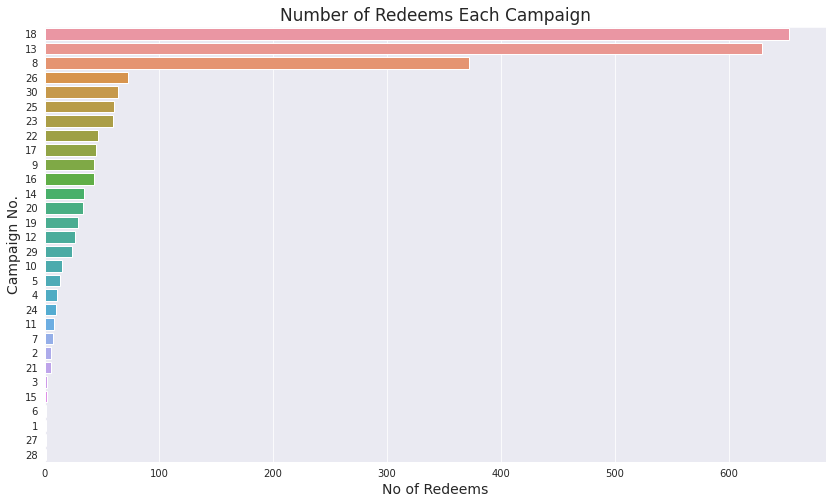

In [ ]:
redeem_frequency = pd.DataFrame(list(zip(dfs["coupon_redempt"].CAMPAIGN.value_counts().index, dfs["coupon_redempt"].CAMPAIGN.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(14,8))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign)
plt.title('Number of Redeems Each Campaign', fontsize=17)
plt.xlabel('No of Redeems', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

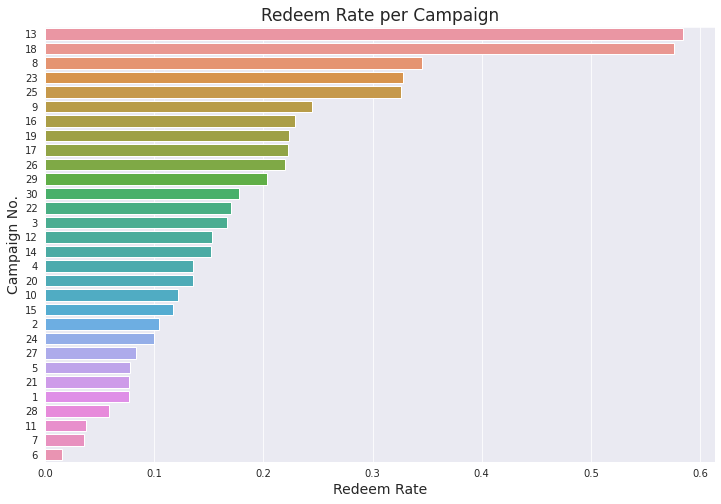

In [ ]:
redems_per_camp = dfs["coupon_redempt"].CAMPAIGN.value_counts().sort_values()/dfs["campaign_table"].CAMPAIGN.value_counts().sort_values()
redems_per_camp = pd.DataFrame(list(zip(redems_per_camp.index,redems_per_camp)),
                               columns=["Campaign","Redeem_Rate"]).sort_values(by="Redeem_Rate",ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y="Campaign",x="Redeem_Rate",data=redems_per_camp,orient="h",order=redems_per_camp.Campaign)
plt.title('Redeem Rate per Campaign', fontsize=17)
plt.xlabel('Redeem Rate', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

In [ ]:
dfs["transaction_data"] = pd.read_csv("transaction_data.csv")
dfs["transaction_data"].head()

transaction=dfs["transaction_data"]

In [ ]:


grouped_sum = dfs["transaction_data"].groupby("household_key").sum()



In [ ]:
av_purc = round(dfs['transaction_data'].SALES_VALUE.sum()/len(grouped_sum),1)
av_purc

141.4

In [ ]:


av_tot_prod = round(grouped_sum["QUANTITY"].mean(),1)
av_tot_prod



769.7

In [ ]:


av_uniq_prod = round(len(dfs["transaction_data"].groupby(["household_key","PRODUCT_ID"]).sum()["QUANTITY"])/len(grouped_sum),1)
av_uniq_prod



43.7

In [ ]:


av_days_visited = round(len(dfs["transaction_data"].groupby(["household_key","DAY"]).count())/len(grouped_sum),1)
av_days_visited



4.0

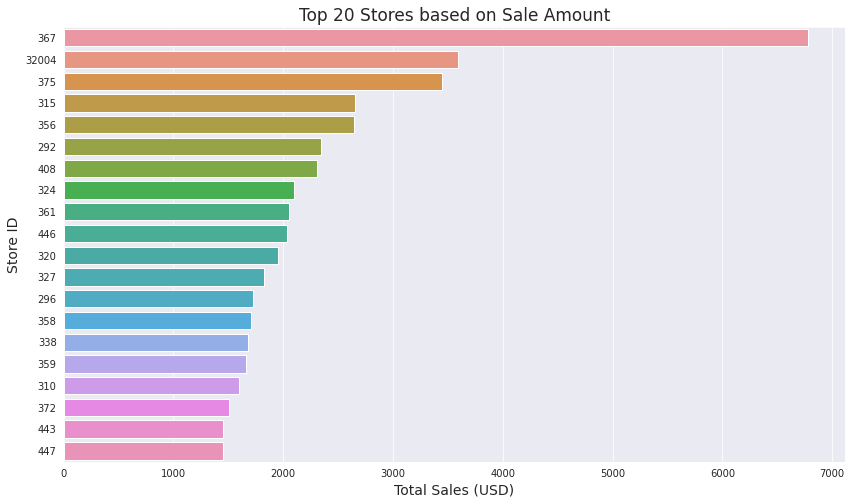

In [ ]:
sales_per_store = dfs["transaction_data"].groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(14,8))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales_per_store[:20],order=sales_per_store[:20]["Store ID"],orient="h")
plt.title('Top 20 Stores based on Sale Amount', fontsize=17)
plt.xlabel('Total Sales (USD)', fontsize=14)
plt.ylabel('Store ID', fontsize=14)
plt.show()

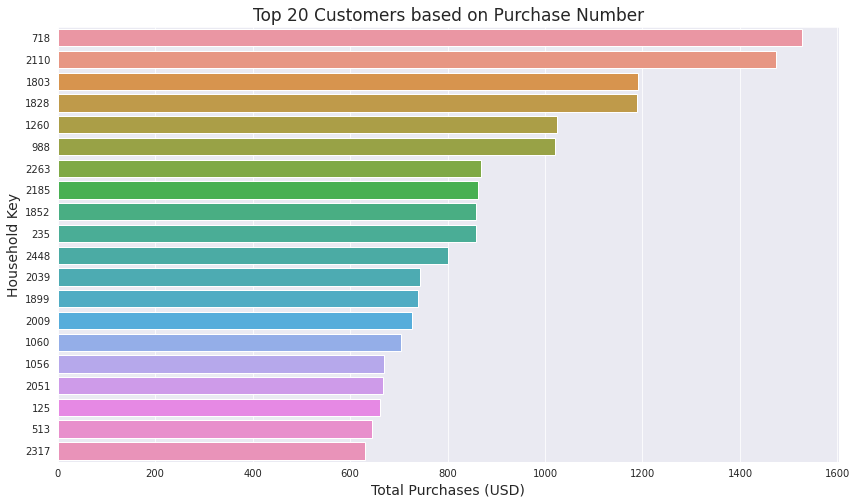

In [ ]:


purc_per_cust = dfs["transaction_data"].groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(14,8))
sns.barplot(y="household_key",x="Total Purchase (USD)",data = purc_per_cust[:20],order=purc_per_cust[:20]["household_key"],orient="h")
plt.title('Top 20 Customers based on Purchase Number', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Household Key', fontsize=14)
plt.show()



In [ ]:
dfs["hh_demographic"] = pd.read_csv("hh_demographic.csv")
dfs["hh_demographic"].head()

demographic=dfs["hh_demographic"]
demographic["MARITAL_STATUS_CODE"].replace(['A', 'B', 'U'],['Married','Unknown','Single'],inplace=True)

In [ ]:
def pie_categorical(data):
    #function to plot the histogram of categorical variables in pie graph
    features = data.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(20,20))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        data[i].value_counts().plot(kind="pie",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=15)
        count += 1

def hist_numeric(data):
    #function to plot the histogram of numeric variables
    features = data.columns
    fig_hists = plt.figure(figsize=(20,20))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        data[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

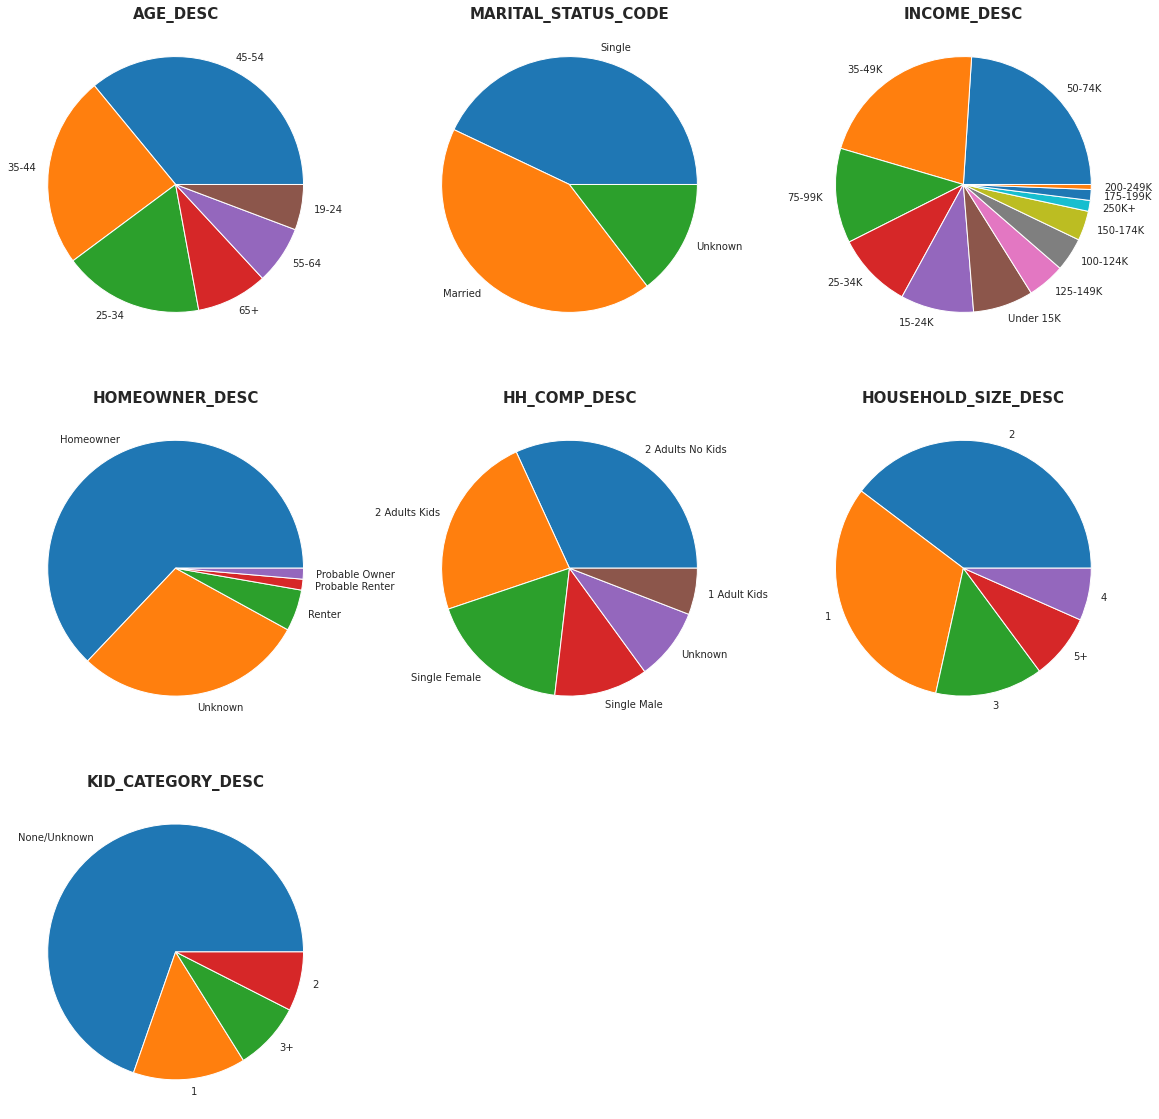

In [ ]:


pie_categorical(dfs["hh_demographic"].drop("household_key",axis=1))



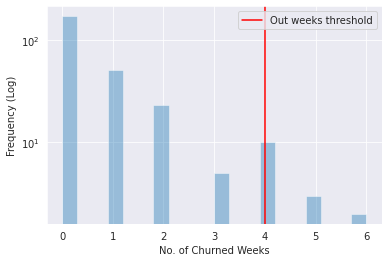

In [ ]:
out_weeks_threshold = 4

#weekly customer purchase amount
weekly_purchase = dfs["transaction_data"].groupby(["household_key","WEEK_NO"]).sum()["SALES_VALUE"]
weekly_purchase = weekly_purchase.unstack()

#customer churned by their last 2 week's purchasing behaviour
#go through all households and calculate out weeks
target = []
common_houses = set(dfs["hh_demographic"].household_key) & set(dfs["transaction_data"].household_key)
for house in common_houses:
  target.append(7-weekly_purchase.loc[house].dropna().index[-1])

target = pd.DataFrame(list(zip(common_houses,target)),columns=["household_key","No. of Churned Weeks"])
ax = sns.distplot(target["No. of Churned Weeks"],kde=False)
ax.axvline(x=out_weeks_threshold,c="red",label="Out weeks threshold")
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Frequency (Log)")


In [ ]:


target["isChurned"] = target["No. of Churned Weeks"]>=out_weeks_threshold
target.drop("No. of Churned Weeks",axis=1,inplace=True)



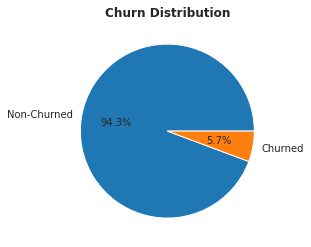

In [ ]:
target.isChurned.value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Non-Churned","Churned"])
plt.ylabel("")
plt.title("Churn Distribution",fontweight="bold")


In [ ]:
household_per_campaign = dfs["campaign_table"].groupby("CAMPAIGN")["household_key"].apply(list)
total_campaigns = len(dfs["campaign_table"].CAMPAIGN.unique())
df_camp = pd.DataFrame(np.full((total_households,total_campaigns),0),columns=["Camp_"+str(i) for i in range(1,total_campaigns+1)],
                                                                                                           index=range(1,total_households+1))
for camp in household_per_campaign.index:
    df_camp.loc[household_per_campaign[camp],"Camp_"+str(camp)] = 1

df_camp["household_key"] = df_camp.index

In [ ]:


temp = dfs["campaign_table"].household_key.value_counts().sort_index()
no_of_received_campaigns = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_received_campaigns"])



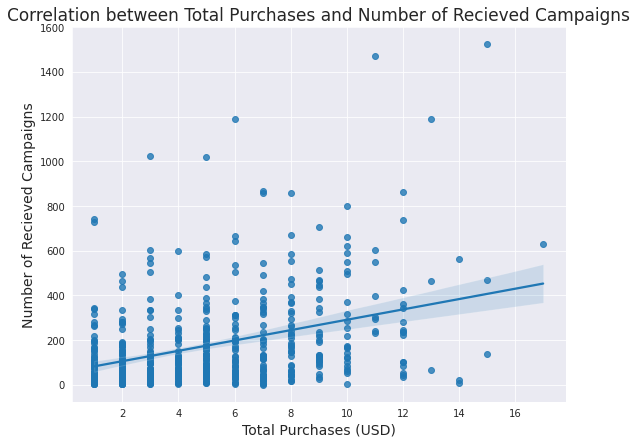

In [ ]:
# plt.figure(figsize=(14,4))
no_of_received_campaigns_vs_sumsales = pd.merge(no_of_received_campaigns,purc_per_cust,on="household_key")
sns.lmplot(x="no_of_received_campaigns",y="Total Purchase (USD)",data=no_of_received_campaigns_vs_sumsales,
                                                                                                          size=6, aspect=1.3)
plt.title('Correlation between Total Purchases and Number of Recieved Campaigns', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Number of Recieved Campaigns', fontsize=14)


In [ ]:
no_of_received_campaigns_vs_sumsales.drop("household_key",axis=1).corr()

,no_of_received_campaigns,Total Purchase (USD)
no_of_received_campaigns,1.000000,0.374438
Total Purchase (USD),0.374438,1.000000


In [ ]:
temp = dfs["coupon_redempt"].groupby("household_key")["CAMPAIGN"].apply(list)
rede_camp_history_per_household = pd.DataFrame(list(zip(temp.index,temp.values)),columns=["household_key","redeemed_CAMPAIGN_list"])

In [ ]:
temp = dfs["coupon_redempt"].household_key.value_counts().sort_index()
no_of_rede_per_household = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_redeems"])

In [ ]:


camp_list = dfs["campaign_table"].groupby("household_key")["DESCRIPTION"].apply(list)
most_freq_type = pd.DataFrame(list(zip(camp_list.index,[pd.Series(i).value_counts().idxmax() for i in camp_list])),columns=["household_key","most_freq_camp_type"])



In [ ]:
store_per_house = dfs["transaction_data"].groupby("household_key")["STORE_ID"].apply(list).apply(np.unique)

churn_houses = set(target.household_key[target.isChurned == True].sort_values().values) & set(dfs["hh_demographic"].household_key.unique())
churn_stores = []
for i in churn_houses:
  churn_stores.extend(store_per_house[i])

churn_stores = pd.Series(churn_stores).value_counts()/len(churn_houses)

df_store = dfs["transaction_data"].groupby(["STORE_ID","household_key"]).count()["BASKET_ID"].unstack("STORE_ID")
df_store.replace(np.nan,0,inplace=True)
df_store[df_store>0] = 1

#select the top stores with high number of churners
df_store = df_store.loc[:,churn_stores.index[:20]]
df_store.columns=["Store_"+str(i) for i in df_store.columns]

In [ ]:
household_per_campaign = dfs["campaign_table"].groupby("CAMPAIGN")["household_key"].apply(list)
total_campaigns = len(dfs["campaign_table"].CAMPAIGN.unique())
df_camp = pd.DataFrame(np.full((total_households,total_campaigns),0),columns=["Camp_"+str(i) for i in range(1,total_campaigns+1)],
                                                                                                           index=range(1,total_households+1))
for camp in household_per_campaign.index:
    df_camp.loc[household_per_campaign[camp],"Camp_"+str(camp)] = 1

df_camp["household_key"] = df_camp.index

In [ ]:
temp = dfs["campaign_table"].household_key.value_counts().sort_index()
no_of_received_campaigns = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_received_campaigns"])

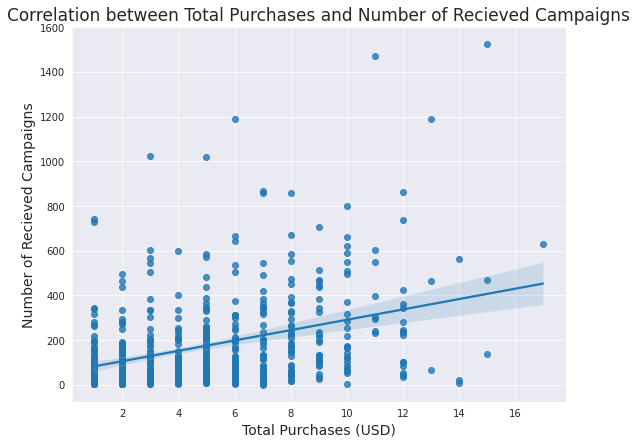

In [ ]:
# plt.figure(figsize=(14,4))
no_of_received_campaigns_vs_sumsales = pd.merge(no_of_received_campaigns,purc_per_cust,on="household_key")
sns.lmplot(x="no_of_received_campaigns",y="Total Purchase (USD)",data=no_of_received_campaigns_vs_sumsales,
                                                                                                          size=6, aspect=1.3)
plt.title('Correlation between Total Purchases and Number of Recieved Campaigns', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Number of Recieved Campaigns', fontsize=14)


In [ ]:


temp = dfs["coupon_redempt"].groupby("household_key")["CAMPAIGN"].apply(list)
rede_camp_history_per_household = pd.DataFrame(list(zip(temp.index,temp.values)),columns=["household_key","redeemed_CAMPAIGN_list"])



In [ ]:
temp = dfs["coupon_redempt"].household_key.value_counts().sort_index()
no_of_rede_per_household = pd.DataFrame(list(zip(temp.index,temp.values.astype(int))),columns=["household_key","no_of_redeems"])

In [ ]:


camp_list = dfs["campaign_table"].groupby("household_key")["DESCRIPTION"].apply(list)
most_freq_type = pd.DataFrame(list(zip(camp_list.index,[pd.Series(i).value_counts().idxmax() for i in camp_list])),columns=["household_key","most_freq_camp_type"])



In [ ]:

churn_houses = set(target.household_key[target.isChurned == True].sort_values().values) & set(dfs["hh_demographic"].household_key.unique())
churn_stores = []
for i in churn_houses:
  churn_stores.extend(store_per_house[i])

churn_stores = pd.Series(churn_stores).value_counts()/len(churn_houses)

df_store = dfs["transaction_data"].groupby(["STORE_ID","household_key"]).count()["BASKET_ID"].unstack("STORE_ID")
df_store.replace(np.nan,0,inplace=True)
df_store[df_store>0] = 1

#select the top stores with high number of churners
df_store = df_store.loc[:,churn_stores.index[:20]]
df_store.columns=["Store_"+str(i) for i in df_store.columns]

In [ ]:
purc_per_cust = dfs["transaction_data"].groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])

In [ ]:


data = pd.merge(dfs["hh_demographic"],df_camp,on="household_key",how="left")
data = pd.merge(data,no_of_received_campaigns,on="household_key",how="left")
data = pd.merge(data,df_store,on="household_key",how="left")
data = pd.merge(data,no_of_rede_per_household,on="household_key",how="left")
data = pd.merge(data,most_freq_type,on="household_key",how="left")
data = pd.merge(data,purc_per_cust,on="household_key",how="left")
data = pd.merge(data,target,on="household_key",how="left")



In [ ]:


data.shape



(801, 60)

In [ ]:


data.head()



,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Camp_1,Camp_2,...,Store_340,Store_31782,Store_32004,Store_295,Store_306,Store_790,no_of_redeems,most_freq_camp_type,Total Purchase (USD),isChurned
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,TypeB,NaN,NaN
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,TypeB,206.91,False
2,25-34,Single,25-34K,Unknown,2 Adults Kids,3,1,8,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,TypeB,NaN,NaN
3,25-34,Single,75-99K,Homeowner,2 Adults Kids,4,2,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,TypeB,NaN,NaN
4,45-54,Unknown,50-74K,Homeowner,Single Female,1,None/Unknown,16,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeA,NaN,NaN


In [ ]:


data.no_of_received_campaigns.replace(np.nan,0,inplace=True)
data.no_of_received_campaigns = data.no_of_received_campaigns.astype(int)
data.no_of_redeems.replace(np.nan,0,inplace=True)



In [ ]:
data = data.fillna(0)

data.KID_CATEGORY_DESC.replace(["None/Unknown","3+"],[0,3],inplace=True)
data.KID_CATEGORY_DESC = data.KID_CATEGORY_DESC.astype(int)
data.HOUSEHOLD_SIZE_DESC.replace("5+",5,inplace=True)
data.HOUSEHOLD_SIZE_DESC = data.HOUSEHOLD_SIZE_DESC.astype(int)
data["Total Purchase (USD)"] = data["Total Purchase (USD)"].astype(int)



In [ ]:


data.head()



,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Camp_1,Camp_2,...,Store_340,Store_31782,Store_32004,Store_295,Store_306,Store_790,no_of_redeems,most_freq_camp_type,Total Purchase (USD),isChurned
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,TypeB,0,0
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,0,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TypeB,206,False
2,25-34,Single,25-34K,Unknown,2 Adults Kids,3,1,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeB,0,0
3,25-34,Single,75-99K,Homeowner,2 Adults Kids,4,2,13,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,TypeB,0,0
4,45-54,Unknown,50-74K,Homeowner,Single Female,1,0,16,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TypeA,0,0


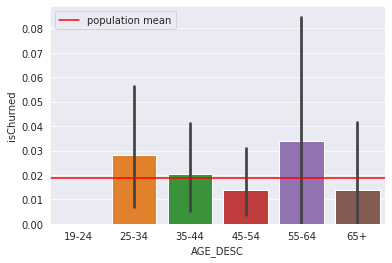

In [ ]:


ax = sns.barplot(x="AGE_DESC",y="isChurned",data=data,order=["19-24","25-34","35-44","45-54","55-64","65+"])
ax.axhline(y=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()



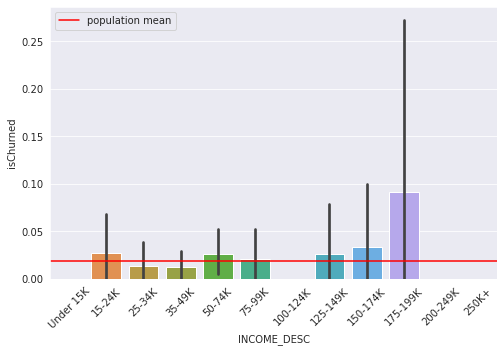

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="INCOME_DESC",y="isChurned",data=data,
                 order=["Under 15K","15-24K","25-34K","35-49K","50-74K","75-99K","100-124K","125-149K","150-174K","175-199K","200-249K","250K+"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.axhline(y=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()

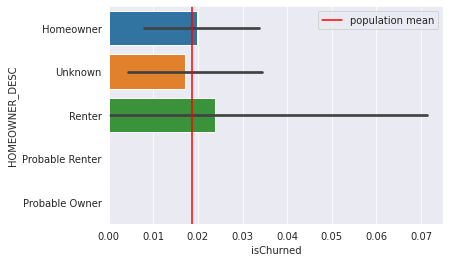

In [ ]:


ax = sns.barplot(y="HOMEOWNER_DESC",x="isChurned",data=data,orient="h")
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()



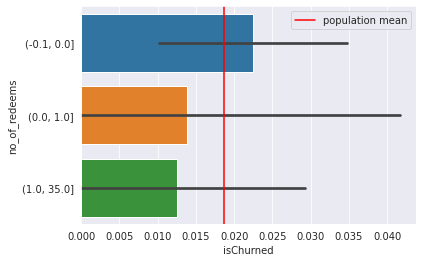

In [ ]:
ax = sns.barplot(y=pd.cut(data.no_of_redeems,bins=[-0.1,0,1,35],duplicates="drop"),x="isChurned",data=data,orient="h")
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()

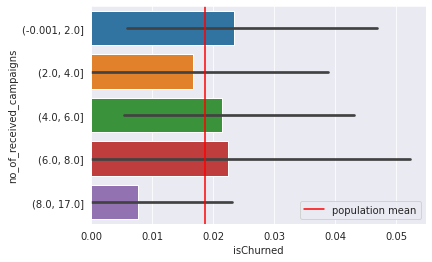

In [ ]:


ax = sns.barplot(y=pd.qcut(data.no_of_received_campaigns,5,duplicates="drop"),x="isChurned",data=data,orient="h")
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()



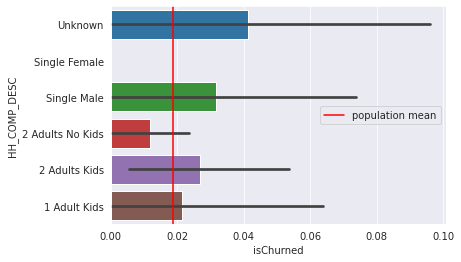

In [ ]:
ax = sns.barplot(y="HH_COMP_DESC",x="isChurned",data=data,orient="h",order=['Unknown','Single Female','Single Male','2 Adults No Kids','2 Adults Kids','1 Adult Kids'])
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()

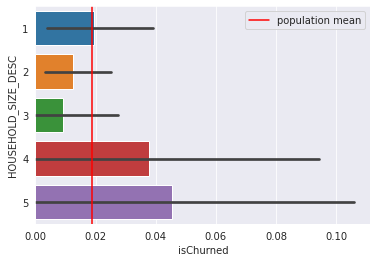

In [ ]:
ax = sns.barplot(y="HOUSEHOLD_SIZE_DESC",x="isChurned",data=data,orient="h")
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()



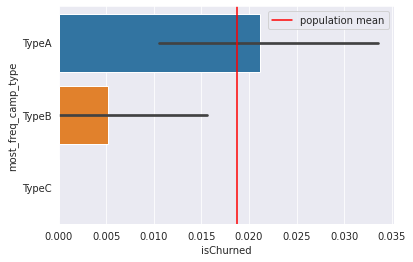

In [ ]:
ax = sns.barplot(y="most_freq_camp_type",x="isChurned",data=data,orient="h",order=['TypeA','TypeB','TypeC'])
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()

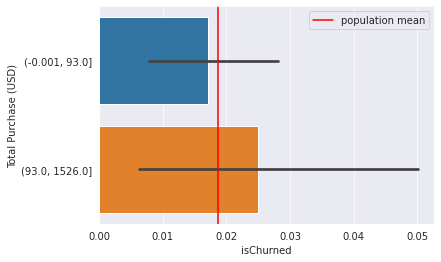

In [ ]:


ax = sns.barplot(y=pd.qcut(data["Total Purchase (USD)"],5,duplicates="drop"),x="isChurned",data=data,orient="h")
ax.axvline(x=data.isChurned.sum()/len(data),c="red",label="population mean")
ax.legend()
plt.show()



In [ ]:
data['isChurned'] = pd.to_numeric(data['isChurned'])

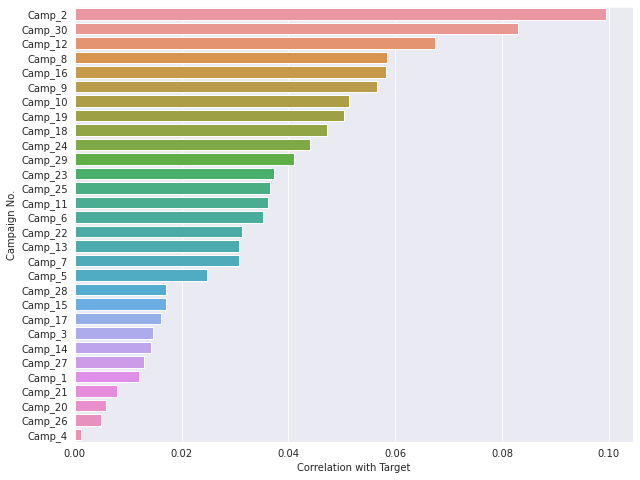

In [ ]:
corrs = abs(data[["Camp_"+str(i) if i<31 else "isChurned" for i in range(1,32)]].corr()["isChurned"])
corrs.drop("isChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Campaign No.","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,8))
sns.barplot(y="Campaign No.",x="Correlation with Target",data = corrs,orient="h")
plt.show()

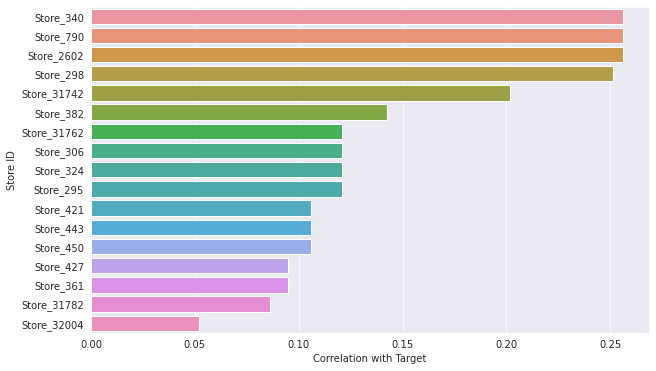

In [ ]:
cols =list(df_store.columns)
cols.extend(["isChurned"])
corrs = abs(data[cols].corr()["isChurned"])
corrs.drop("isChurned",inplace=True)
corrs = pd.DataFrame(list(zip(corrs.index,corrs)),columns=["Store ID","Correlation with Target"]).sort_values(by="Correlation with Target",ascending=False)
fig_store = plt.figure(figsize=(10,6))
sns.barplot(y="Store ID",x="Correlation with Target",data = corrs,orient="h")
plt.show()

In [ ]:
data.dtypes

AGE_DESC                     object
MARITAL_STATUS_CODE          object
INCOME_DESC                  object
HOMEOWNER_DESC               object
HH_COMP_DESC                 object
HOUSEHOLD_SIZE_DESC           int64
KID_CATEGORY_DESC             int64
household_key                 int64
Camp_1                        int64
Camp_2                        int64
Camp_3                        int64
Camp_4                        int64
Camp_5                        int64
Camp_6                        int64
Camp_7                        int64
Camp_8                        int64
Camp_9                        int64
Camp_10                       int64
Camp_11                       int64
Camp_12                       int64
Camp_13                       int64
Camp_14                       int64
Camp_15                       int64
Camp_16                       int64
Camp_17                       int64
Camp_18                       int64
Camp_19                       int64
Camp_20                     

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

#one hot encoding categorical data for modelling
encoded = pd.get_dummies(data[data.columns[data.dtypes==object]])
data_encoded = pd.concat([encoded, data[data.columns[data.dtypes != object]]],axis=1)
data_encoded.head()


,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_Married,MARITAL_STATUS_CODE_Single,MARITAL_STATUS_CODE_Unknown,INCOME_DESC_100-124K,...,Store_31762,Store_340,Store_31782,Store_32004,Store_295,Store_306,Store_790,no_of_redeems,Total Purchase (USD),isChurned
0,0,0,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206,0
2,0,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
#Features (X) and the target (y)
X = data_encoded.drop('isChurned',axis=1)
y = data_encoded.isChurned

#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

Train Data Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       551
           1       1.00      0.56      0.71         9

    accuracy                           0.99       560
   macro avg       1.00      0.78      0.86       560
weighted avg       0.99      0.99      0.99       560

Test Data Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       0.00      0.00      0.00         6

    accuracy                           0.98       241
   macro avg       0.49      0.50      0.49       241
weighted avg       0.95      0.98      0.96       241



[Text(33.0, 0.5, 'real values'),
 Text(0.5, 15.0, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

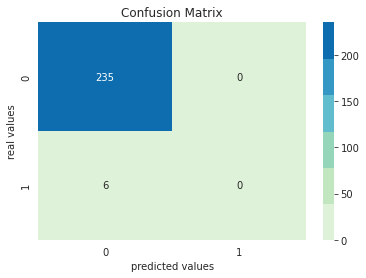

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV

#handle class imbalance problem by undersampling (not used)
# no_churn_down_sampled = data_encoded[data_encoded.isChurned == False].sample(sum(data_encoded.isChurned))
# data_encoded_balanced = pd.concat([no_churn_down_sampled,data_encoded[data_encoded.isChurned]])
#shuffle the dataset to avoiding sampling biases
# data = data_encoded_balanced.sample(frac=1)

#shuffle the dataset to avoiding sampling biases
data = data_encoded.sample(frac=1)
X = data.drop("isChurned",axis=1)
y = data.isChurned

#generate an XGB classifier
mdl = XGBClassifier()

#parameter ranges
param_list = {
    'silent': [False],
    'max_depth': range(2,51),
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': np.arange(0,1.1,.1),
    'colsample_bytree': np.arange(0,1.1,.1),
    'colsample_bylevel': np.arange(0,1.1,.1),
    'min_child_weight': [0.5, 0.7, 1.0, 2.0, 3.0],
    'gamma': [0, 0.25, 0.5, 0.75, 0.9, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0],
    'n_estimators': [2, 5, 10, 20, 50, 100],
    'scale_pos_weight': [1, 1.5, 2, 6, 6.1, 6.3, 6.5, 8],
    'max_delta_step': [1, 2, 3, 5, 10]
}

kfold = 5
cv_strat = RepeatedStratifiedKFold(n_splits=kfold,n_repeats=10)

#Randomized Search
# cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="roc_auc",n_jobs=-1).fit(X.values,y.values)
cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="balanced_accuracy",n_jobs=-1).fit(X.values,y.values)
# cv = RandomizedSearchCV(mdl,param_list,cv=cv_strat,n_iter=100,verbose=1,scoring="average_precision",n_jobs=-1).fit(X.values,y.values)

#use the best estimator after the hyperparameter optimisation
mdl_best = cv.best_estimator_

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


KeyboardInterrupt: ignored

In [ ]:
cv.best_params_

In [ ]:


from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

cv_strat = RepeatedStratifiedKFold(n_splits=kfold,n_repeats=20)
scores = cross_validate(mdl_best,X.values,y.values,cv=cv_strat,verbose=3,n_jobs=-1,return_train_score=True,
                        scoring={"roc_auc":"roc_auc",
                                 "recall":"recall",
                                 "precision":"precision",
                                 "accuracy":"accuracy",
                                 "balanced_accuracy":"balanced_accuracy",
                                 "average_precision":"average_precision"}) 

pd.DataFrame(pd.DataFrame(scores).mean(),columns=["Score"]).drop(["fit_time","score_time"])



In [ ]:
roc_auc_score(y_test,y_pred)
# average_precision_score(y_test,y_pred)

In [ ]:
#We call campaign the new dataframe merging the dataset
campaign = pd.merge(campaign_desc[['CAMPAIGN','START_DAY']],campaign_table[['household_key','CAMPAIGN']],on="CAMPAIGN",how="left")
#Count number of campaign per household
campaign['#campaign']=campaign.groupby(by='household_key')['CAMPAIGN'].transform('count')
#Delete useless column
campaign=campaign.drop(columns=['CAMPAIGN','START_DAY'])
#Delete duplicates
campaign.drop_duplicates(subset=['household_key', '#campaign'], keep="first", inplace=True)
campaign



In [ ]:
#Keep only coupon redeemed before DAY 615
coupon_redempt=coupon_redempt[coupon_redempt['DAY']<615]
#Drop useless columns
coupon_redempt=coupon_redempt.drop(columns=['DAY','COUPON_UPC'])
#Keep only one occurence of coupon redeemed by campaign
coupon_redempt.drop_duplicates(subset=['household_key', 'CAMPAIGN'], keep="first", inplace=True)
#Count number of campaign the customer redeemed at least one coupon
redemption_per_household=coupon_redempt.groupby(['household_key'], as_index=False)['CAMPAIGN'].agg({'redeemed': pd.Series.nunique})
redemption_per_household

In [ ]:
#Merging of campaign and coupon redemption tables
temp = pd.merge(campaign, redemption_per_household, on=['household_key'],how="left")
#Creation of our output variable
temp["Sensitivity"]= np.where(temp["redeemed"]>0, 'Sensible', 'Not sensible')
#Creation of our aggregated dataset. We use the inner join to keep only customers for which we have the demographics data and thoose who were part of at least one campaign
dataset= pd.merge(demographic, temp[['household_key','Sensitivity']], on=['household_key'],how="inner")

In [ ]:
#Keep transaction before day 615
transaction=transaction[transaction['DAY']<615]
#Exclude transactions related to returns
transaction=transaction[transaction['SALES_VALUE']>0]
transaction=transaction[transaction['QUANTITY']>0]
transaction.head(20)

In [ ]:
#Calculate total sales per customer
total_sales=transaction.groupby(by='household_key', as_index=False)['SALES_VALUE'].sum().rename(columns={'SALES_VALUE': 'Total_sales'})
#Calculate total number of visits per customer
total_visits=transaction.groupby(['household_key'], as_index=False)['BASKET_ID'].agg({'total_visits': pd.Series.nunique})
#Calculate median basket amount per customer
temp_basket=transaction.groupby(['household_key','BASKET_ID'], as_index=False)['SALES_VALUE'].sum()
temp_median_basket=temp_basket.groupby(['household_key'], as_index=False)['SALES_VALUE'].median().rename(columns={'SALES_VALUE': 'median_basket'})
#Calculate average product price bought per customer
temp_product=transaction.groupby(['household_key'], as_index=False)['SALES_VALUE'].mean().rename(columns={'SALES_VALUE': 'avg_price'})
dataset=dataset.merge(total_sales,on='household_key').merge(total_visits,on='household_key').merge(temp_median_basket,on='household_key').merge(temp_product,on='household_key')
dataset=dataset.drop(columns=['household_key'])
dataset

In [ ]:
categorical_vars = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC']
num_plots = len(categorical_vars)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols    
    plot = sns.countplot(x=var, data=dataset, ax=axs[row][pos],hue='Sensitivity',palette="Set1")

In [ ]:
categorical_vars = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC']
num_plots = len(categorical_vars)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(x=var, y='median_basket',data=dataset, ax=axs[row][pos],palette="Set1",estimator=np.median)

In [ ]:
target = dataset['Sensitivity']
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

In [ ]:


import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
warnings.filterwarnings('ignore')

import xgboost as xgb
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:


target = dataset['Sensitivity']
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))



In [ ]:
#1. Split data into X and Y
X=dataset.drop(columns=['Sensitivity'])
Y=dataset['Sensitivity']

#2.A. Encode string class values as integers
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(dataset['Sensitivity'])
label_encoded_y = label_encoder.transform(dataset['Sensitivity'])

#2.A. Encode Income values as integers
X['INCOME_DESC'].replace(['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

#2.A. Encode Income values as integers
X['AGE_DESC'].replace(['19-24', '25-34', '35-44', '45-54', '55-64', '65+'],[0,1,2,3,4,5],inplace=True)

#2.A. Label encoding the other categorical data
labelencoder_X_1 = LabelEncoder()
X['MARITAL_STATUS_CODE'] = labelencoder_X_1.fit_transform(X['MARITAL_STATUS_CODE'])
labelencoder_X_2 = LabelEncoder()
X['HOMEOWNER_DESC'] = labelencoder_X_2.fit_transform(X['HOMEOWNER_DESC'])
labelencoder_X_3 = LabelEncoder()
X['HH_COMP_DESC'] = labelencoder_X_3.fit_transform(X['HH_COMP_DESC'])
labelencoder_X_4 = LabelEncoder()
X['HOUSEHOLD_SIZE_DESC'] = labelencoder_X_4.fit_transform(X['HOUSEHOLD_SIZE_DESC'])
X["KID_CATEGORY_DESC"].replace(['None/Unknown','3+'],[0,3],inplace=True)
X['HOUSEHOLD_SIZE_DESC'] = X.HOUSEHOLD_SIZE_DESC.astype(float)
X['KID_CATEGORY_DESC'] = X.KID_CATEGORY_DESC.astype(float)

In [ ]:
#Let's plot the Skewness by decreasing order
num_feats=X.dtypes[X.dtypes!='object'].index
skew_feats=X[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
print(skewness)

In [ ]:
df = pd.DataFrame(data=X, columns=['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC','Total_sales','total_visits','median_basket','avg_price'])
#Permet de tracer les courbes de distribution de toutes les variables
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
# Finding the relations between the variables
plt.figure(figsize=(20,10))
c= X.corr(method='spearman')
sns.heatmap(c,annot=True)
c

In [ ]:


#remove attribute
X=X.drop(columns=['HOUSEHOLD_SIZE_DESC'])



In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X,label_encoded_y ,
test_size=0.3, random_state=7,shuffle=True)



In [ ]:
#instantiate 
pt = PowerTransformer(method='yeo-johnson', standardize=True) 

#Fit the data to the powertransformer
rescaler = pt.fit(X_train)

#Lets get the Lambdas that were found
print (rescaler.lambdas_)

calc_lambdas = rescaler.lambdas_

#Transform the data 
X_train_resc = rescaler.transform(X_train)
X_test_resc=rescaler.transform(X_test)

#Pass the transformed data into a new dataframe 
df_xt = pd.DataFrame(data=X_train_resc, columns=['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC','Total_sales','total_visits','median_basket','avg_price'])

df_xt.describe()

In [ ]:


# on standardized data
pca_std = PCA(n_components=7).fit(X_train_resc)
X_train_PCA = pca_std.transform(X_train_resc)
X_test_PCA = pca_std.transform(X_test_resc)
pca_std.explained_variance_ratio_



In [ ]:
from sklearn.model_selection import cross_val_score

#check the performance of the XGBoost model without tune parameters
# fit model on training data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = xgb.XGBClassifier()
kfold = StratifiedKFold(n_splits=5, random_state=7,shuffle=True)


Accuracy = cross_val_score(model, X_train_PCA, y_train, cv=kfold,scoring='accuracy')
Precision = cross_val_score(model, X_train_PCA, y_train, cv=kfold,scoring='precision')

print("Accuracy: %.1f%% (%.1f%%)" % (Accuracy.mean()*100, Accuracy.std()*100))
print("Precision: %.1f%% (%.1f%%)" % (Precision.mean()*100, Precision.std()*100))

In [ ]:
# grid search to tune algorithm
model = xgb.XGBClassifier()
n_estimators = [50,100, 200, 300, 400,450, 500,600,1000]
learning_rate = [0.01,0.05,0.1,0.2]
max_depth= range(2,8)
gamma=[0, 0.25, 0.5, 0.7, 0.9, 1.0]

param_grid = dict(gamma=gamma,learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth)
eval_set=[(X_train_PCA, y_train), (X_test_PCA, y_test)]
kfold = StratifiedKFold(n_splits=5, random_state=7,shuffle=True)
grid_search = GridSearchCV(model, param_grid,scoring='precision', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_PCA, y_train,early_stopping_rounds= 20,eval_metric= ["logloss"],eval_set=eval_set,verbose=20)                       

# summarize result
print("Best: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))

In [ ]:
# fit model on training data
model = xgb.XGBClassifier(learning_rate = 0.05,\
                          max_depth=2,\
                          n_estimators=200,\
                          gamma=0.7,\
                          objective = 'binary:logistic',\
                         )
fit_params={'early_stopping_rounds': 20, 
            'eval_metric': 'logloss',
            'verbose': False,
            'eval_set': [(X_train_PCA, y_train), (X_test_PCA, y_test)]}
                         
kfold =  StratifiedKFold(n_splits=5, random_state=7,shuffle=True)

Accuracy = cross_val_score(model, X_train_PCA, y_train, cv=kfold,scoring='accuracy',fit_params = fit_params)
Precision = cross_val_score(model, X_train_PCA, y_train, cv=kfold,scoring='precision',fit_params = fit_params)

print("Accuracy: %.1f%%" % (Accuracy.mean()*100))
print("Precision: %.1f%%" % (Precision.mean()*100))

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.05,\
                          max_depth=2,\
                          n_estimators=200,\
                          gamma=0.7,\
                          objective = 'binary:logistic',\
                          )

eval_set = [(X_train_PCA, y_train), (X_test_PCA, y_test)]
model.fit(X_train_PCA, y_train, early_stopping_rounds=20, eval_metric=["error","logloss"], eval_set=eval_set, verbose=False)
# make predictions for test data
predictions = model.predict(X_test_PCA)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print("accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print(classification_report(y_test, predictions,   labels=[1,0]))

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()